### COIN GAME 1

We have an average growth rate:  0.06134983141341


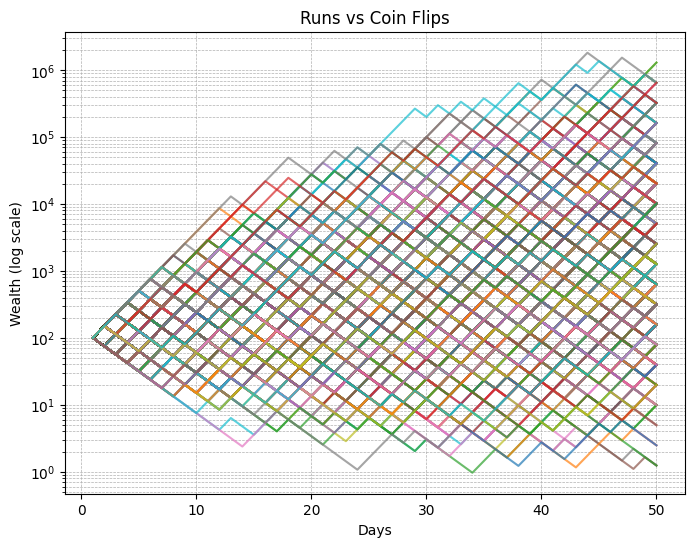

In [100]:
import random
import matplotlib.pyplot as plt
import numpy as np

def coinFlip() -> int:
    return random.randint(1, 100)

def newW(f, w) -> int:
    wager = w * f
    if coinFlip() > 50:
        return w + 2 * wager
    else:
        return w - wager
        
# f* = p - q/b
kelly_fraction = 0.5 - 0.5/2


fraction = kelly_fraction

initial_wealth = 100
flips = 50
num_runs = 1000
# we will adjust to find average g at the end
growth_rate_total = 0


plt.figure(figsize=(8, 6))

for run in range(num_runs):
    wealth = [initial_wealth]
    for i in range(1, flips):
        wealth.append(newW(fraction, wealth[i-1]))
    growth_rate_total += ( pow( (wealth[-1]/wealth[0]), (1/flips)) - 1 ) 
    n = np.arange(1, len(wealth) + 1) 
    plt.plot(n, wealth, linestyle="-", alpha=0.7, label=f"Run {run+1}") 
    
print("We have an average growth rate:  " + str(growth_rate_total/ num_runs))

plt.yscale("log")
plt.xlabel("Days")
plt.ylabel("Wealth (log scale)")
plt.title("Runs vs Coin Flips")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


### Lets plot now the fractions vs their avg growth rate

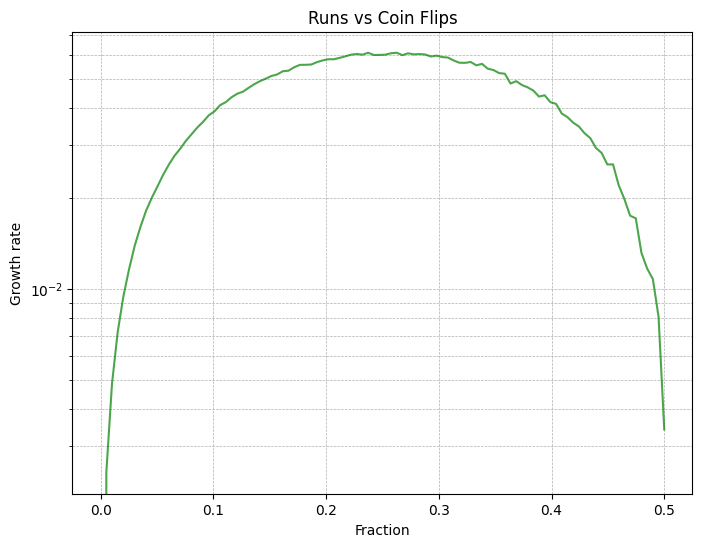

In [115]:
import random
import matplotlib.pyplot as plt
import numpy as np

def coinFlip() -> int:
    return random.randint(1, 100)

def newW(f, w) -> int:
    wager = w * f
    if coinFlip() > 50:
        return w + 2 * wager
    else:
        return w - wager
        
# f* = p - q/b
kelly_fraction = 0.5 - 0.5/2

fractions = np.linspace(0,0.5,100)

initial_wealth = 100
flips = 50
num_runs = 10000
# we will adjust to find average g at the end
growth_rate_total = 0


plt.figure(figsize=(8, 6))


def findGrowth(fraction) -> float:
    
    growth_rate_total =0
    for run in range(num_runs):
        wealth = [initial_wealth]
        for i in range(1, flips):
            wealth.append(newW(fraction, wealth[i-1]))
        growth_rate_total += ( pow( (wealth[-1]/wealth[0]), (1/flips)) - 1 ) 
        n = np.arange(1, len(wealth) + 1) 
        
    return growth_rate_total/ num_runs

growths = []

for f in fractions:
    growths.append(findGrowth(f))

plt.plot(fractions, growths, linestyle="-", alpha=0.7, color = 'green') 

plt.yscale("log")
plt.xlabel("Fraction")
plt.ylabel("Growth rate")
plt.title("Runs vs Coin Flips")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()